# Question 2
### Introduction
This report details the analysis of chip purchasing behavior using two datasets: transaction_data and purchase_behaviour. The primary aim is to uncover purchasing patterns, identify customer segments, and provide data-driven strategic recommendations for the retail store's chip category for the next six months. The approach involved cleaning and merging the datasets, performing exploratory data analysis (EDA), and finally offering actionable insights.

### Data Cleaning and Preparation :
The analysis began by examining both the transaction_data and purchase_behaviour datasets for inconsistencies, missing data, and outliers.

* **Missing Data**: Both datasets were checked for null values. Any missing data in essential fields, needs to either be imputed with appropriate values or removed to maintain the integrity of the dataset.


In [1]:
import pandas as pd 

#Loading datasets 
file_path = r'D:\WPI Assignments\Machine Learning CS539-F24\Homeworks\Homework1\datasets\transaction_data.xlsx'
transaction_data = pd.read_excel(file_path)
file_path = r'D:\WPI Assignments\Machine Learning CS539-F24\Homeworks\Homework1\datasets\purchase_behaviour.csv'
purchase_behaviour = pd.read_csv(file_path)

In [2]:
transaction_data['TOT_SALES'].describe()

count    264836.000000
mean          7.304200
std           3.083226
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: TOT_SALES, dtype: float64

In [3]:
print("\nNull values in Transaction Data :\n",transaction_data.isnull().sum())
print("\nNull values in Purchase Behaviour :\n",purchase_behaviour.isnull().sum())


Null values in Transaction Data :
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Null values in Purchase Behaviour :
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


#### As we can see there are no Missing values in the datasets, therefore there is no need to interpolate or remove any values from the datasets.

* **Outliers**: Outliers were identified and removed to prevent them from skewing the analysis results. This was done using the Interquartile Range (IQR) method, focusing on TOT_SALES to ensure reasonable values for all transactions.




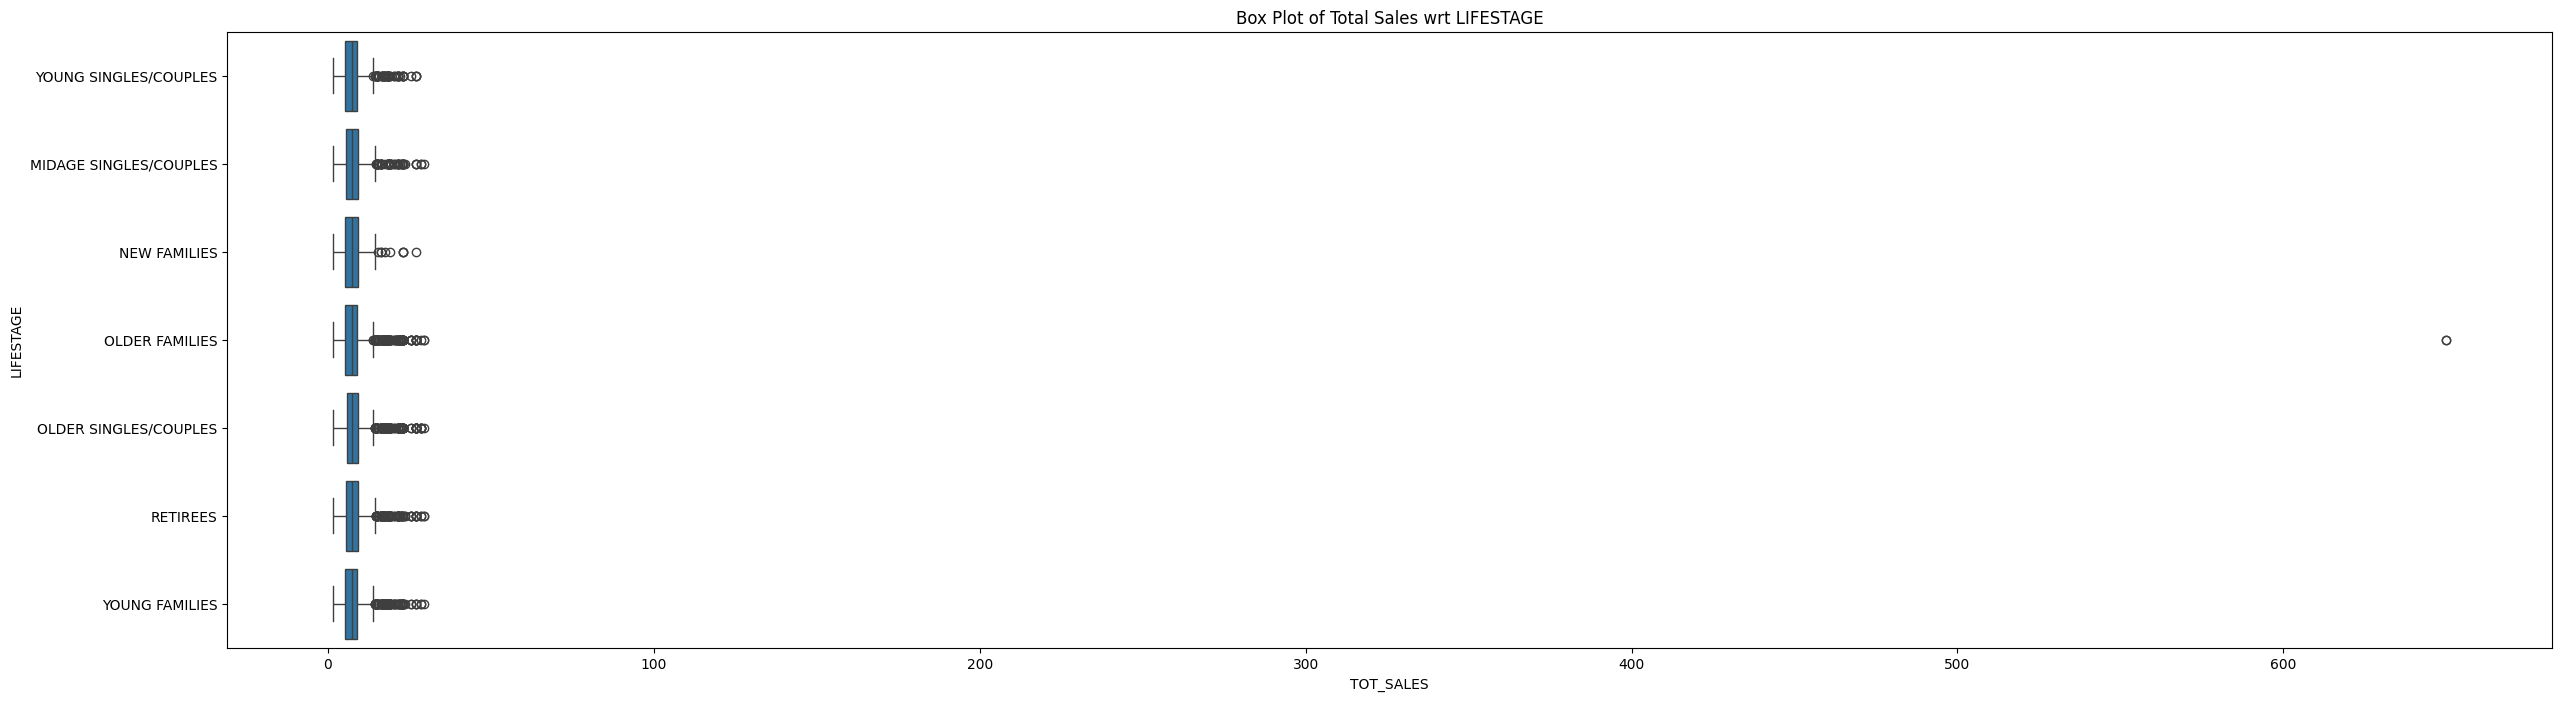

In [4]:
#data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Merge transaction and customer data on 'customer_id'
merged_data = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR')

#merged_data.head(10)
# Detecting outliers using the IQR method
Q1 = merged_data['TOT_SALES'].quantile(0.25)
Q3 = merged_data['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

    # Create a box plot for temperature across different years
plt.figure(figsize=(30, 8))
sns.boxplot(x='TOT_SALES', y='LIFESTAGE', data = merged_data)
plt.title('Box Plot of Total Sales wrt LIFESTAGE')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.show()


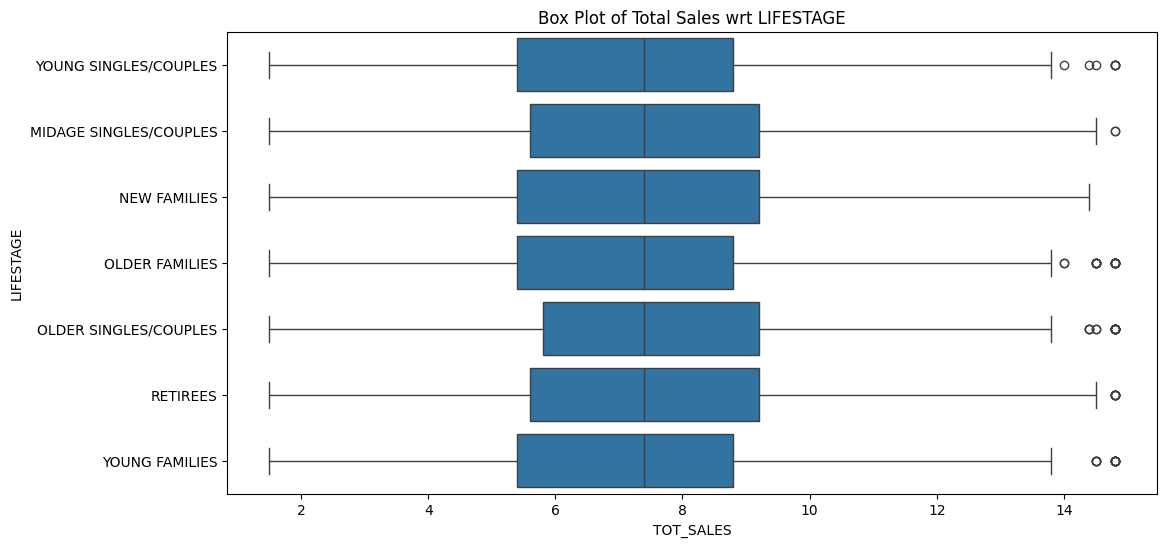

In [5]:
# Removing outliers
outliers = (merged_data['TOT_SALES'] < (Q1 - 1.5 * IQR)) | (merged_data['TOT_SALES'] > (Q3 + 1.5 * IQR))
merged_data = merged_data[~outliers]

# Create a box plot for temperature across different years
plt.figure(figsize=(12, 6))
sns.boxplot(x='TOT_SALES', y='LIFESTAGE', data=merged_data)
plt.title('Box Plot of Total Sales wrt LIFESTAGE')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.show()

* **Data Formats**: The data formats for numerical fields (e.g., sales values, pack sizes) were standardized, ensuring consistency across all records. Categorical variables, such as brand names and customer segments, were checked to ensure proper labeling.

### Feature Engineering
1. Extract PACK_SIZE from the Product Name
2. Calculate various values such as 'Average prices' and 'Sales per product unit'

In [6]:
import re
def pack_size(product):
    match = re.search(r'(\d+)(g)',product)
    if match:
        return int(match.group(1))
    else:
        return None

transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].apply(pack_size)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


In [7]:
transaction_data['PACK_SIZE'].isnull().sum()

6064

In [8]:
transaction_data['PACK_SIZE'] = transaction_data['PACK_SIZE'].fillna(transaction_data['PACK_SIZE'].median())
transaction_data['SALES_PER_UNIT'] = transaction_data['TOT_SALES'] / transaction_data['PROD_QTY']
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,SALES_PER_UNIT
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,3.00
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,2.10
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,1.45
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,3.00
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,4.60


In [9]:
# Merge transaction and customer data on 'LYLTY_CARD_NBR'
merged_data = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR')

In [10]:
merged_data.nunique()

DATE                   364
STORE_NBR              272
LYLTY_CARD_NBR       72637
TXN_ID              263127
PROD_NBR               114
PROD_NAME              114
PROD_QTY                 6
TOT_SALES              112
PACK_SIZE               21
SALES_PER_UNIT          52
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

### Exploratory Data Analysis (EDA)
The next phase involved analyzing purchasing behavior by calculating key metrics such as total sales, sales drivers, and pack size preferences.

- **Total Sales and Sales Drivers**
Total sales were calculated across different customer segments to identify which segments contributed most to chip sales. The segments were based on LIFESTAGE and PREMIUM_CUSTOMER.

In [67]:
customer_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']).reset_index()
customer_sales.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOTAL_SALES', 'AVG_SALES']
customer_sales.head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL_SALES,AVG_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,7.074661
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,7.647284
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,7.112056
3,NEW FAMILIES,Budget,21928.45,7.297321
4,NEW FAMILIES,Mainstream,17013.90,7.317806
5,NEW FAMILIES,Premium,11491.10,7.231655
6,OLDER FAMILIES,Budget,168363.25,7.269570
7,OLDER FAMILIES,Mainstream,103445.55,7.262395
8,OLDER FAMILIES,Premium,81958.40,7.322945
9,OLDER SINGLES/COUPLES,Budget,136769.80,7.430315


                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_SALES  AVG_SALES
0   MIDAGE SINGLES/COUPLES           Budget     35514.80   7.074661
1   MIDAGE SINGLES/COUPLES       Mainstream     90803.85   7.647284
2   MIDAGE SINGLES/COUPLES          Premium     58432.65   7.112056
3             NEW FAMILIES           Budget     21928.45   7.297321
4             NEW FAMILIES       Mainstream     17013.90   7.317806
5             NEW FAMILIES          Premium     11491.10   7.231655
6           OLDER FAMILIES           Budget    168363.25   7.269570
7           OLDER FAMILIES       Mainstream    103445.55   7.262395
8           OLDER FAMILIES          Premium     81958.40   7.322945
9    OLDER SINGLES/COUPLES           Budget    136769.80   7.430315
10   OLDER SINGLES/COUPLES       Mainstream    133393.80   7.282116
11   OLDER SINGLES/COUPLES          Premium    132263.15   7.449766
12                RETIREES           Budget    113147.80   7.443445
13                RETIREES       Mainstream    1

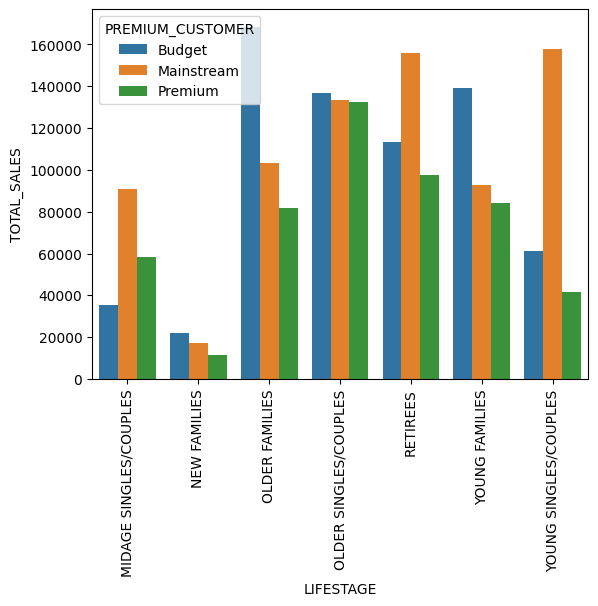

In [14]:
sns.barplot(data = customer_sales, x='LIFESTAGE', y='TOTAL_SALES', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=90)
print(customer_sales)

**Key Insight:**
1) Older Families with young children in the budget category were the highest spenders on chips.
2) Young singles and couples in the economy segment preferred smaller pack sizes and were more price-sensitive, favoring economy brands.



In [18]:
pack_size_sales = merged_data.groupby(['PACK_SIZE','LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']).reset_index()
pack_size_sales.columns = ['PACK_SIZE','LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOTAL', 'AVG']
pack_size_sales

,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL,AVG
0,70.0,MIDAGE SINGLES/COUPLES,Budget,122.40,4.533333
1,70.0,MIDAGE SINGLES/COUPLES,Mainstream,230.40,4.608000
2,70.0,MIDAGE SINGLES/COUPLES,Premium,280.80,4.387500
3,70.0,NEW FAMILIES,Budget,60.00,4.615385
4,70.0,NEW FAMILIES,Mainstream,36.00,4.500000
...,...,...,...,...,...
436,380.0,YOUNG FAMILIES,Mainstream,3370.55,11.910071
437,380.0,YOUNG FAMILIES,Premium,3104.20,11.713962
438,380.0,YOUNG SINGLES/COUPLES,Budget,2066.20,11.290710
439,380.0,YOUNG SINGLES/COUPLES,Mainstream,7175.90,11.463099


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(1, 0, 'NEW FAMILIES'),
  Text(2, 0, 'OLDER FAMILIES'),
  Text(3, 0, 'OLDER SINGLES/COUPLES'),
  Text(4, 0, 'RETIREES'),
  Text(5, 0, 'YOUNG FAMILIES'),
  Text(6, 0, 'YOUNG SINGLES/COUPLES')])

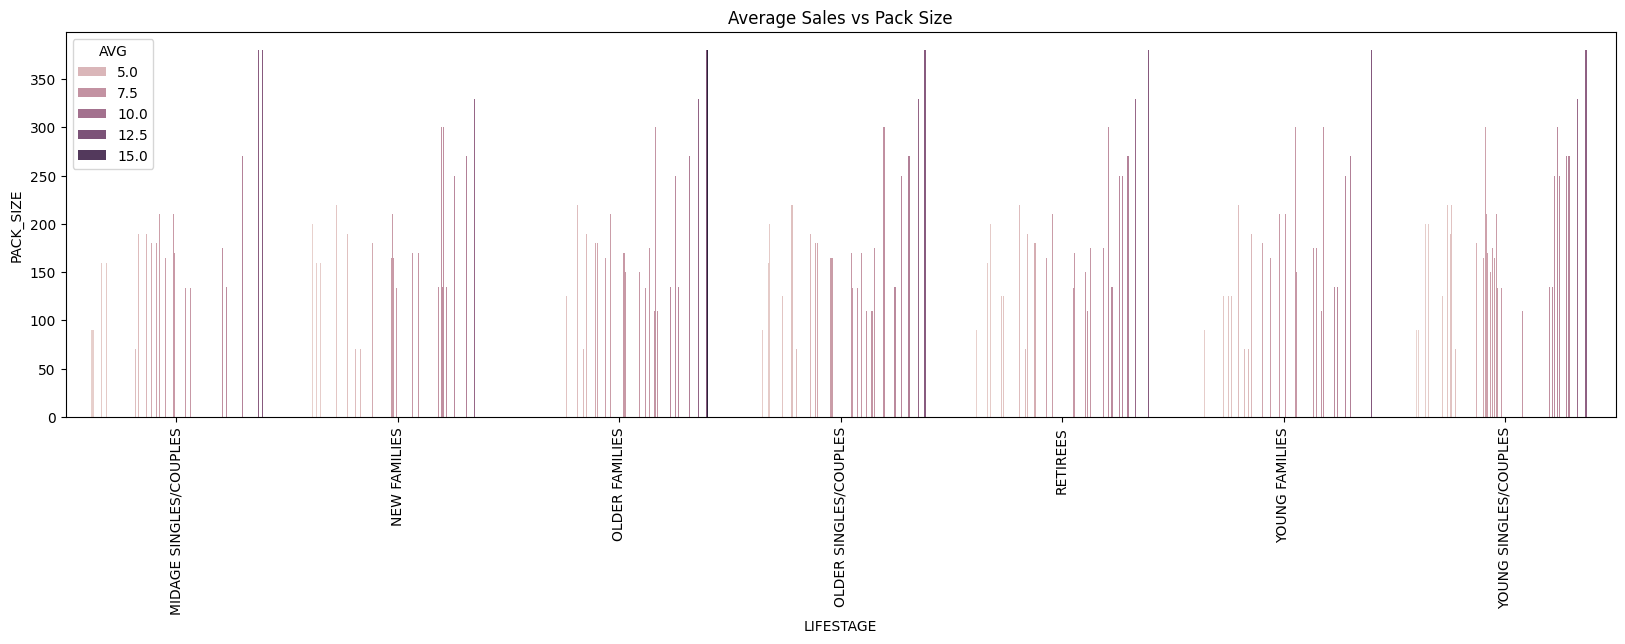

In [53]:
plt.figure(figsize=(20,5))
sns.barplot(data=pack_size_sales, x='LIFESTAGE', y='PACK_SIZE', hue='AVG')
plt.title('Average Sales vs Pack Size')
plt.xticks(rotation=90)

**Key Insight:**
1) Large pack sizes were preferred by family-oriented segments, especially those in the Older Families.

### Customer Segmentation and Trends
Customer segmentation based on Lifestage and Premium Status revealed distinct purchasing patterns. By segmenting customers into categories such as young singles and couples, families with young children, and older families, we could identify variations in purchasing habits across these groups.

* **Average Sales per Customer Segment**
The analysis showed that premium customers, particularly older families, had the highest average sales per transaction.

In [63]:
# Group by Lifestage and Premium Customer, then calculate total sales and average sales per transaction
segment_analysis = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': ["sum", "mean"],
    'TXN_ID': "count"}).reset_index()

# Rename columns for clarity
segment_analysis.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOTAL', 'AVG', 'TOT_SALES']
print(segment_analysis)

                 LIFESTAGE PREMIUM_CUSTOMER      TOTAL       AVG  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   35514.80  7.074661       5020
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85  7.647284      11874
2   MIDAGE SINGLES/COUPLES          Premium   58432.65  7.112056       8216
3             NEW FAMILIES           Budget   21928.45  7.297321       3005
4             NEW FAMILIES       Mainstream   17013.90  7.317806       2325
5             NEW FAMILIES          Premium   11491.10  7.231655       1589
6           OLDER FAMILIES           Budget  168363.25  7.269570      23160
7           OLDER FAMILIES       Mainstream  103445.55  7.262395      14244
8           OLDER FAMILIES          Premium   81958.40  7.322945      11192
9    OLDER SINGLES/COUPLES           Budget  136769.80  7.430315      18407
10   OLDER SINGLES/COUPLES       Mainstream  133393.80  7.282116      18318
11   OLDER SINGLES/COUPLES          Premium  132263.15  7.449766      17754
12          

**Key Insight:**
Premium older families and families with young children were the most valuable customer segments in terms of total revenue.
Economy young singles and couples preferred smaller pack sizes and accounted for lower overall revenue, but had frequent, smaller transactions.



### Summary
This project involved the analysis of two primary datasets:

- **Transaction Data:** This dataset includes detailed sales transaction records, encompassing product names, quantities sold, total sales amounts, and various other attributes.
- **Customer Data:** This dataset provides information about customers, such as their life stage and premium customer status.

#### **Data Cleaning Process:**

To ensure the integrity and quality of the data, the following steps were undertaken:

- Outlier Treatment: Outliers were identified and managed using the Interquartile Range (IQR) method, minimizing their potential impact on the analysis.
- Missing Value Imputation: Missing values were addressed by imputing medians where applicable, ensuring the dataset remained robust for subsequent analyses.
- Feature Extraction: Additional features were derived, such as the extraction of PACK_SIZE from product names, and the calculation of SALES_PER_UNIT to provide deeper insights into product performance.

#### Feature Engineering:

Developed key metrics like SALES_PER_UNIT to facilitate a more nuanced understanding of product-level performance.
Integrated the transaction data with customer information, enabling a comprehensive analysis that combines sales performance with customer demographics.
Customer Segmentation Analysis:

The customer data was segmented based on LIFESTAGE and PREMIUM_CUSTOMER status to analyze patterns in total and average sales. This segmentation allowed for the identification of specific customer groups that contribute significantly to overall sales.

#### Correlation Analysis between Pack Size and Sales:

An in-depth examination of the relationship between chip pack sizes and sales metrics (total and average) was conducted to identify any significant trends or patterns.

#### Visualization Techniques:

To effectively communicate the findings, a range of visualizations were employed:

*Bar Plots:* Illustrated total and average sales across different customer segments and premium status groups.
*Box Plots:* Showcased the distribution of prices within various customer segments, providing insights into spending behavior.